# Proyecto de análisis de la empresa Zuber 

En el siguiente análisis, presentaremos información de la empresa Zuber, una nueva empresa de viajes compartidos. Los datos que tenemos a continuación son de Noviembre del 2017 de la ciudad de Chicago, los viajes hechos por las diferentes compañías de taxis, así como la información del viaje como el destino y la duración. 

El objetivo de nuestro análisis es determinar si hay patrones de acuerdo a las preferencias de los pasajeros y el impacto de los factores externos como el clima. 

Analizaremos nuestros datos según los barrios, duración y compañías.

## Preparación de los datos

Vamos a realizar nuestro análisis, primero preparando y limpiando nuestros datos, identificando duplicados y ausentes, así como conviertiendo datos al tipo de datos más útil para nuestro análisis.

### Cargar datos 

In [1]:
# Cargamos todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns

In [6]:
# Cargamos los dataset
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv', header='infer')
df_location = pd.read_csv('/datasets/project_sql_result_04.csv', header='infer')
df_loop = pd.read_csv('/datasets/project_sql_result_07.csv', header='infer')

#### Descripción de los datos 

**df_companies:**
* *company_name*: nombre de la empresa de taxis
* *trips_amount*: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

**df_location:**
* *dropoff_location_name*: barrios de Chicago donde finalizaron los viajes
* *average_trips*: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

**df_loop:**
* *start_ts*: fecha y hora de la recogida del Loop hacia el Aeropuerto Internacional O'Hare
* *weather_conditions*: condiciones climáticas en el momento en el que comenzó el viaje
* *duration_seconds*: duración del viaje en segundos

#### df_companies

In [3]:
# Imprimimos información general de df_companies y verificamos si hay filas duplicadas
df_companies.info()
print(df_companies.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
0


In [5]:
#Mostramos el DataFrame 
print(df_companies)

                       company_name  trips_amount
0                         Flash Cab         19558
1         Taxi Affiliation Services         11422
2                 Medallion Leasing         10367
3                        Yellow Cab          9888
4   Taxi Affiliation Service Yellow          9299
..                              ...           ...
59     4053 - 40193 Adwar H. Nikola             7
60          2733 - 74600 Benny Jona             7
61    5874 - 73628 Sergey Cab Corp.             5
62       2241 - 44667 - Felman Corp             3
63      3556 - 36214 RC Andrews Cab             2

[64 rows x 2 columns]


#### df_location

In [4]:
# Imprimimos información general de df_location y verificamos si hay filas duplicadas
df_location.info()
print(df_location.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB
0


In [8]:
# Mostramos los datos
print(df_location)

   dropoff_location_name  average_trips
0                   Loop   10727.466667
1            River North    9523.666667
2          Streeterville    6664.666667
3              West Loop    5163.666667
4                 O'Hare    2546.900000
..                   ...            ...
89       Mount Greenwood       3.137931
90             Hegewisch       3.117647
91              Burnside       2.333333
92             East Side       1.961538
93             Riverdale       1.800000

[94 rows x 2 columns]


#### df_loop

In [7]:
# Imprimimos información general de df_loop y verificamos si hay filas duplicadas
df_loop.info()
print(df_loop.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
197


In [10]:
# Mostramos los datos
print(df_loop)

                 start_ts weather_conditions  duration_seconds
0     2017-11-25 16:00:00               Good            2410.0
1     2017-11-25 14:00:00               Good            1920.0
2     2017-11-25 12:00:00               Good            1543.0
3     2017-11-04 10:00:00               Good            2512.0
4     2017-11-11 07:00:00               Good            1440.0
...                   ...                ...               ...
1063  2017-11-25 11:00:00               Good               0.0
1064  2017-11-11 10:00:00               Good            1318.0
1065  2017-11-11 13:00:00               Good            2100.0
1066  2017-11-11 08:00:00               Good            1380.0
1067  2017-11-04 16:00:00                Bad            2834.0

[1068 rows x 3 columns]


#### Observaciones
* Notamos que en df_companies y df_location no tenemos filas duplicadas. Sin embargo, en df_loop tenemos 197 filas completamente duplicadas. 
* En ninguno de los DataFrames tenemos datos ausentes
* Los nombres de las columnas ya se encuentran en el estilo adecuado. 
* El tipo de dato de start_ts en df_loop se cambiará a datetime y evaluaremos si duration_seconds se puede cambiar a int


### Limpieza de datos 

#### df_loop

In [15]:
# ELiminamos las filas completamente duplicadas de df_loop
df_loop = df_loop.drop_duplicates()
print(df_loop.duplicated().sum())

0


In [44]:
# Cambiamos el tipo de datos de start_ts
df_loop['start_ts'] = pd.to_datetime(df_loop['start_ts'], format= '%Y-%m-%dT%H:%M:%S')
print(df_loop['start_ts'])

0      2017-11-25 16:00:00
1      2017-11-25 14:00:00
2      2017-11-25 12:00:00
3      2017-11-04 10:00:00
4      2017-11-11 07:00:00
               ...        
1060   2017-11-04 14:00:00
1061   2017-11-18 16:00:00
1063   2017-11-25 11:00:00
1064   2017-11-11 10:00:00
1067   2017-11-04 16:00:00
Name: start_ts, Length: 871, dtype: datetime64[ns]


In [18]:
#Comprobamos que no tengamos decimales en duration_seconds para convertir a int
np.array_equal(df_loop['duration_seconds'], df_loop['duration_seconds'].astype('int'))

True

In [19]:
# Convertimos a entero duration_seconds
df_loop['duration_seconds'] = df_loop['duration_seconds'].astype('int')
print(df_loop.head())

             start_ts weather_conditions  duration_seconds
0 2017-11-25 16:00:00               Good              2410
1 2017-11-25 14:00:00               Good              1920
2 2017-11-25 12:00:00               Good              1543
3 2017-11-04 10:00:00               Good              2512
4 2017-11-11 07:00:00               Good              1440


#### df_companies

In [20]:
# Verificamos que no tengamos compañías duplicadas
print(df_companies['company_name'].duplicated().sum())

0


#### df_location

In [21]:
# Verificamos que no tengamos ubicaciones duplicadas
print(df_location['dropoff_location_name'].duplicated().sum())

0


## Análisis de datos

### Barrios principales

Identificamos los 10 barrios con el mayor promedio de viajes siendo el destino del viaje durante el mes de Noviembre.

In [22]:
main_neighborhood = df_location.sort_values(by='average_trips', ascending = False).head(10)
print(main_neighborhood)

  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
5             Lake View    2420.966667
6            Grant Park    2068.533333
7         Museum Campus    1510.000000
8            Gold Coast    1364.233333
9    Sheffield & DePaul    1259.766667


In [53]:
print(df_location['average_trips'].sum())

56395.65044988819


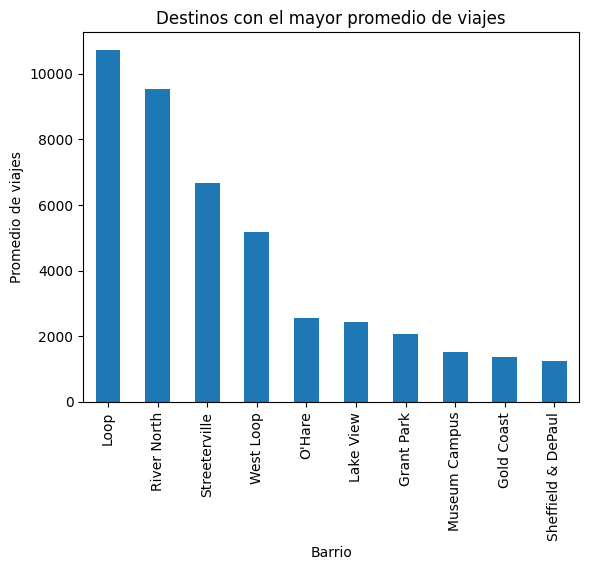

In [25]:
# Realizamos gráfico de barras para visualizar los datos
main_neighborhood.plot(y= 'average_trips',
                       x='dropoff_location_name',
                       title= 'Destinos con el mayor promedio de viajes',
                       xlabel= 'Barrio',
                       ylabel= 'Promedio de viajes', 
                       kind= 'bar',
                       legend= False)
plt.show()


#### Observaciones

* Notamos que el destino más popular es *Loop*, siendo que es la central del distrito financiero, sede del gobierno y la principal zona del centro de Chicago. 
* Seguido de *River North*, conocida por sus tiendas de lujo, galerias, restaurantes y bares. 
* En tercer lugar, está el destino *Streeterville*, donde se pueden encontrar hoteles, restaurantes, museos y un parque de diversiones. 
* A partir de *O'Hare* vemos que su promedio es a penas un 20% del promedio de *Loop*, probablemente no son destinos tan populares entre los turistas y locales. 


### Compañías populares

Identificamos las 10 compañías con el mayor número de viajes el 15 y 16 de Noviembre.

In [28]:
main_companies = df_companies.sort_values(by='trips_amount', ascending = False).head(10)
print(main_companies)
print()
print('El promedio de viajes de las compañías populares es:', main_companies['trips_amount'].mean())

                        company_name  trips_amount
0                          Flash Cab         19558
1          Taxi Affiliation Services         11422
2                  Medallion Leasing         10367
3                         Yellow Cab          9888
4    Taxi Affiliation Service Yellow          9299
5          Chicago Carriage Cab Corp          9181
6                       City Service          8448
7                           Sun Taxi          7701
8          Star North Management LLC          7455
9  Blue Ribbon Taxi Association Inc.          5953

El promedio de viajes de las compañías populares es: 9927.2


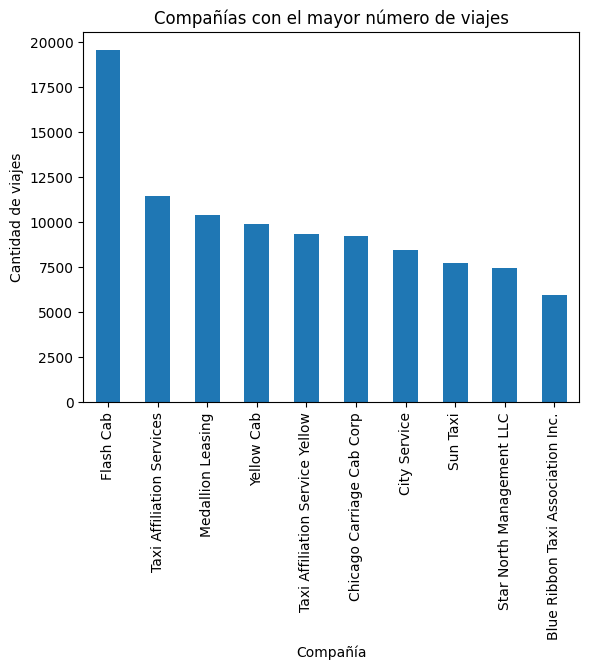

In [27]:
# Realizamos gráfico de barras para visualizar los datos
main_companies.plot(y= 'trips_amount',
                       x='company_name',
                       title= 'Compañías con el mayor número de viajes',
                       xlabel= 'Compañía',
                       ylabel= 'Cantidad de viajes', 
                       kind= 'bar',
                       legend= False)
plt.show()

In [34]:
# Observamos las compañías menos populares
minor_company = df_companies.sort_values(by='trips_amount', ascending = True).head(30)
print(minor_company)

                          company_name  trips_amount
63         3556 - 36214 RC Andrews Cab             2
62          2241 - 44667 - Felman Corp             3
61       5874 - 73628 Sergey Cab Corp.             5
60             2733 - 74600 Benny Jona             7
59        4053 - 40193 Adwar H. Nikola             7
58             5062 - 34841 Sam Mestas             8
57                         Metro Group            11
56       5997 - 65283 AW Services Inc.            12
55           6057 - 24657 Richard Addo            13
54           2192 - 73487 Zeymane Corp            14
53            5006 - 39261 Salifu Bawa            14
52           3721 - Santamaria Express            14
51                4623 - 27290 Jay Kim            15
50        2823 - 73307 Lee Express Inc            15
49              5074 - 54002 Ahzmi Inc            16
48  3623 - 72222 Arrington Enterprises            20
46     3620 - 52292 David K. Cab Corp.            21
47       4615 - 83503 Tyrone Henderson        

El promedio de viajes de todas las compañías es: 2145.484375


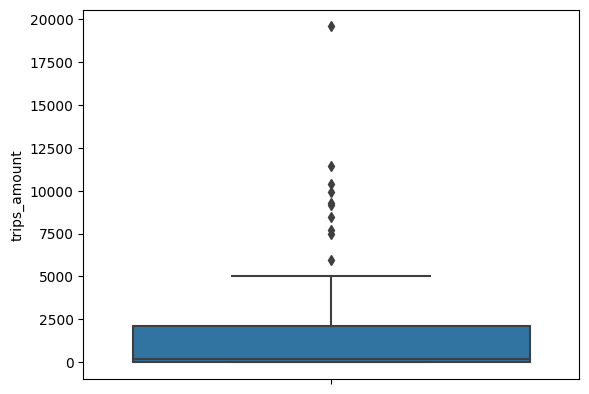

In [37]:
# Creamos un diagrama de caja para todas las compañía
sns.boxplot(y= 'trips_amount',
            data= df_companies)
print('El promedio de viajes de todas las compañías es:', df_companies['trips_amount'].mean())

#### Observaciones 

* La compañía más popular es *Flash Cab*, la cual casi duplica el valor de las dos compañías que le siguen. Su nombre supone que sea por el servicio rápido. 
* Seguido de *Taxi Affiliation Services* y *Medallion Leasing* las cuales a penas superan el promedio que obtuvimos de las 10 compañías, 9927 viajes. 
* De las 64 compañías, casi 30 son compañías que tuvieron menos de 100 viajes en los 2 días que se analizaron. 
* Gracias al diagrama de caja, podemos notar que hay un sesgo muy grande a la derecha. 


## Prueba de hipótesis

**"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".**

In [43]:
# Verificamos que las fechas que tenemos en el DataFrame son sábado (5)
df_loop['weekday'] = df_loop['start_ts'].dt.weekday
print(df_loop[df_loop['weekday'] == 5])

                start_ts weather_conditions  duration_seconds  weekday
0    2017-11-25 16:00:00               Good              2410        5
1    2017-11-25 14:00:00               Good              1920        5
2    2017-11-25 12:00:00               Good              1543        5
3    2017-11-04 10:00:00               Good              2512        5
4    2017-11-11 07:00:00               Good              1440        5
...                  ...                ...               ...      ...
1060 2017-11-04 14:00:00               Good              2700        5
1061 2017-11-18 16:00:00                Bad              2186        5
1063 2017-11-25 11:00:00               Good                 0        5
1064 2017-11-11 10:00:00               Good              1318        5
1067 2017-11-04 16:00:00                Bad              2834        5

[871 rows x 4 columns]


In [51]:
# Generamos nuestras variables por cada plataforma para poder aplicar la hipótesis
dfloop_good = df_loop.query("weather_conditions == 'Good'")['duration_seconds']
print(dfloop_good)
print()
dfloop_bad = df_loop.query("weather_conditions == 'Bad'")['duration_seconds']
print(dfloop_bad)
dfloop_good_avg = dfloop_good.mean()
dfloop_bad_avg = dfloop_bad.mean()
dfloop_good_cnt = dfloop_good.count()
dfloop_bad_cnt = dfloop_bad.count()
print('La duración promedio en segundos en buen clima es:', dfloop_good_avg)
print('La duración promedio en segundos en mal clima es:', dfloop_bad_avg)
print()
print('El total de viajes en buen clima en sábado es:', dfloop_good_cnt)
print('El total de viajes en mal clima en sábado es:', dfloop_bad_cnt)

0       2410
1       1920
2       1543
3       2512
4       1440
        ... 
1057    2492
1059    1303
1060    2700
1063       0
1064    1318
Name: duration_seconds, Length: 723, dtype: int64

6       2969
30      1980
34      2460
51      2760
52      2460
        ... 
1031    2560
1032    1908
1053    2400
1061    2186
1067    2834
Name: duration_seconds, Length: 148, dtype: int64
La duración promedio en segundos en buen clima es: 2032.253112033195
La duración promedio en segundos en mal clima es: 2409.2297297297296

El total de viajes en buen clima en sábado es: 723
El total de viajes en mal clima en sábado es: 148


In [48]:
# Sacamos la varianza y desviación estándar
var_good = np.var(dfloop_good)
print('La varianza de la duración en buen clima es:', var_good)
var_bad = np.var(dfloop_bad)
print('La varianza de la duración en mal clima es:', var_bad)
print()
dev_good =np.sqrt(var_good)
print('La desviación estándar de la duración en buen clima es:', dev_good)
dev_bad =np.sqrt(var_bad)
print('La desviación estándar de la duración en mal clima es:', dev_bad)

La varianza de la duración en buen clima es: 597389.5417434273
La varianza de la duración en mal clima es: 561003.0958728999

La desviación estándar de la duración en buen clima es: 772.9097888779953
La desviación estándar de la duración en mal clima es: 749.0013991127786


In [50]:
# Probamos la hipótesis
alpha = 0.05
results = st.ttest_ind(dfloop_good, dfloop_bad, equal_var=False) 
print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula") 
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  9.126383933880083e-08
Rechazamos la hipótesis nula


#### Observaciones

**Nuestra hipótesis nula: La duración de los viajes en buen clima y mal clima es igual.**

**Nuestra hipótesis alternativa: La duración de los viajes en mal clima es mayor**

* Hemos comprobado que se rechaza la hipótesis nula, ya que existe menos de 0.001% que la duración de de un viaje sea igual durante los días lluviosos y soleados. 
* Hemos decidido plantear la hipótesis nula como igualdad, ya que al final se espera saber si hay cambio. 
* Hemos hecho la hipótesis alternativa con la duración mayor en mal clima, ya que en un escenario común cuando hay lluvia, el tráfico empeora, en consecuencia se toma más tiempo. Se comprueba que la duración en días lluviosos es mayor. 
    * La duración promedio en días de mal clima fue de 2409.23 segundos, aproximadamente 40min.
    * La duración promedio en días de buen clima fue de 2032.25 segundos, aproximadamente 33min.
* Es importante mencionar que a pesar que la duración en días lluviosos es mayor, del total de los 871 viajes a analizar en los días sábados, sólo el 17% fueron en días lluviosos, comparado con el 83% en días de buen clima. Esto puede significar que los sábados que se evaluaron fueron sábados de buen clima. 
 


## Conclusiones

* Los barrios más populares como destino de viaje son *Loop, River North* y *Streeterville*, los cuales representan el 48% del total de viajes analizados, teniendo en cuenta lo que se puede encontrar en cada barrio, es de esperar que los turistas y locales viajen a esos barrios. 
* Las compañías *Flash Cab, Taxi Affiliation Services* y *Medallion Leasing* son las más populares, el número de sus viajes representan el 30% del total de los viajes en los 2 días analizados.
* Si tomamos en cuenta que analizamos 64 compañías de las cuales, 61 compañías representan 70% y sólo 3 el 30%, es una diferencia enorme, y nos hace identificar a nuestros principales oponentes. 
* Hemos comprobado que el clima **sí** afecta la duración de los viajes, por lo que si se identifica un diagnostico de mal clima, se recomienda contar con más vehículos y conductores. 